# Bond valuation

Intro to Bonds XXXXXXXXXX

We define a few variables that we will use
- $FV$ is the _Face Value_ that represents XXXXXXXXXXX
- $\text{coupon rate}$ is the annualized interest rate paid by the bond.
- $\text{market rate}$ is the annualized interest rate that prevails in the market for a given level of risk.
- $\text{frequency}$ is the number of coupons paid by year. 
- $r$ is the _Yield to Maturity_.
  
    $$
    r = \frac{\text{market rate}}{\text{frequency} * FV}
    $$

To calculate the _Bond Price_ $P(r)$ we use the following expression.

$$
    P(r) = {\color{chocolate} C} * {\color{royalblue}PV_A} + {\color{purple}PV_{FV}}
$$

Where:

- $C$ is the _Periodic Coupon Payment_.

    $$
        C = {\color{chocolate} \frac{\text{coupon rate}}{\text{frequency} * FV}}
    $$

- $PV_A$ is the _Present Value of an Annuity_.
  
    $$
        PV_A = {\color{royalblue} \frac{1-(1+r)^{-n}}{r}}
    $$

- $PV_{FV}$ is the _Present Value of the Face Value_.

    $$
        PV_F = {\color{purple}\frac{F}{(1+r)^{n}}}
    $$

In [21]:
# We create some example values
my_market_rate = .08
my_coupon_rate = .05
my_frequency = 4
my_face_value = 100
my_years = 2

In [22]:
def get_bond_price(market_rate, coupon_rate, frequency, face_value, years):
    coupon = coupon_rate / frequency * face_value
    required_rate = market_rate / frequency
    n_coupons = years * frequency
    pv_coupon = coupon * ((1 - (1 + required_rate) ** (-n_coupons)) / required_rate)
    pv_fv = face_value / (1 + required_rate) ** n_coupons
    bond_price = pv_coupon + pv_fv
    return bond_price


Then, use the defined function to calculate the bonde price.

In [23]:
my_market_bond_price = get_bond_price(
    my_market_rate, 
    my_coupon_rate, 
    my_frequency, 
    my_face_value, 
    my_years
)
print(f"The market bond price is {my_market_bond_price:4.4f} USD")


The market bond price is 94.5059 USD


# Find the Yield to Maturity of a Bond

A different output that we could calculate is the YTM rate. Given that the formula cannot be symbolically solved we use numeric solving by doing multiple iterations. In this case we use `scipy.optimize.fsolve` function, which will perform the iterative search by itself.
More details can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

First we need to define a function named `find_market_value` that wraps `fsolve` for convenience.

In [24]:
from scipy.optimize import fsolve

In [25]:
def function_to_solve(independant_variable, market_bond_price, interest_rate, frequency, face_value, years):
    """fsolve will use this method many times by modifying independant variable until it returns 0.
    In other words, fsolve will find the roots of this method.

    Args:
        independant_variable (float): represents market_value.
        fixed_params (list): all the other parameters that don't change.

    Returns:
        float: get_bond_price(independant_variable, *other_params) - market_bond_price
    """
    return get_bond_price(independant_variable, interest_rate, frequency, face_value, years) - market_bond_price

def find_market_rate(
    market_bond_price:float,
    initial_guess:float, 
    coupon_rate:float, 
    frequency:float,
    face_value:float, 
    years:float
    ):
    """Solve the yield to maturity function for market_bond_price

    Args:
        market_bond_price (float): value to solve for
        initial_guess (float): a guess of market_rate to initialize the numerical solver
        interest_rate (float): interest coupon rate
        frequency (float): coupons paid per year
        face_value (float): nominal value at the future
        years (float): life remaining of the bond in years
    """ 
    parameters = (market_bond_price, coupon_rate, frequency, face_value, years)
    return fsolve(function_to_solve, initial_guess, parameters)[0]

In [26]:
ytm = find_market_rate(
    market_bond_price=my_market_bond_price,
    initial_guess=0.10,
    coupon_rate=my_coupon_rate,
    frequency=my_frequency,
    face_value=my_face_value,
    years=my_years
)

print(f"The Yield to Maturity of this bond is {ytm:.04}")

The Yield to Maturity of this bond is 0.08


In [27]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/4p/1qzxhhhn5qjd1ldnjc3_4d540000gn/T/ipykernel_26422/3780985090.py:5: RuntimeWarning: invalid value encountered in double_scalars
  pv_coupon = coupon * ((1 - (1 + required_rate) ** (-n_coupons)) / required_rate)


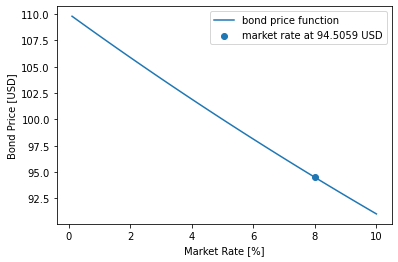

In [28]:
r = np.linspace(0, 0.10, 100)
b = [get_bond_price(x, my_coupon_rate, my_frequency, my_face_value, my_years) for x in r]
plt.plot(r*100, b, label='bond price function')
plt.scatter([ytm*100], [my_market_bond_price], label=f'market rate at {my_market_bond_price:.4f} USD')
plt.xlabel("Market Rate [%]")
plt.ylabel("Bond Price [USD]")
plt.legend()
plt.show()